<a href="https://colab.research.google.com/github/Zlade101/vigilant-chainsaw/blob/master/Hamoye_linearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and performing data preprocessing

In [1]:
#import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
quiz_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [3]:
quiz_set.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
quiz_set.drop(columns=['date', 'lights'], inplace=True, axis=1)


In [5]:
quiz_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [6]:
quiz_set.corr()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabccf3c0d0>,
      dtype=object)

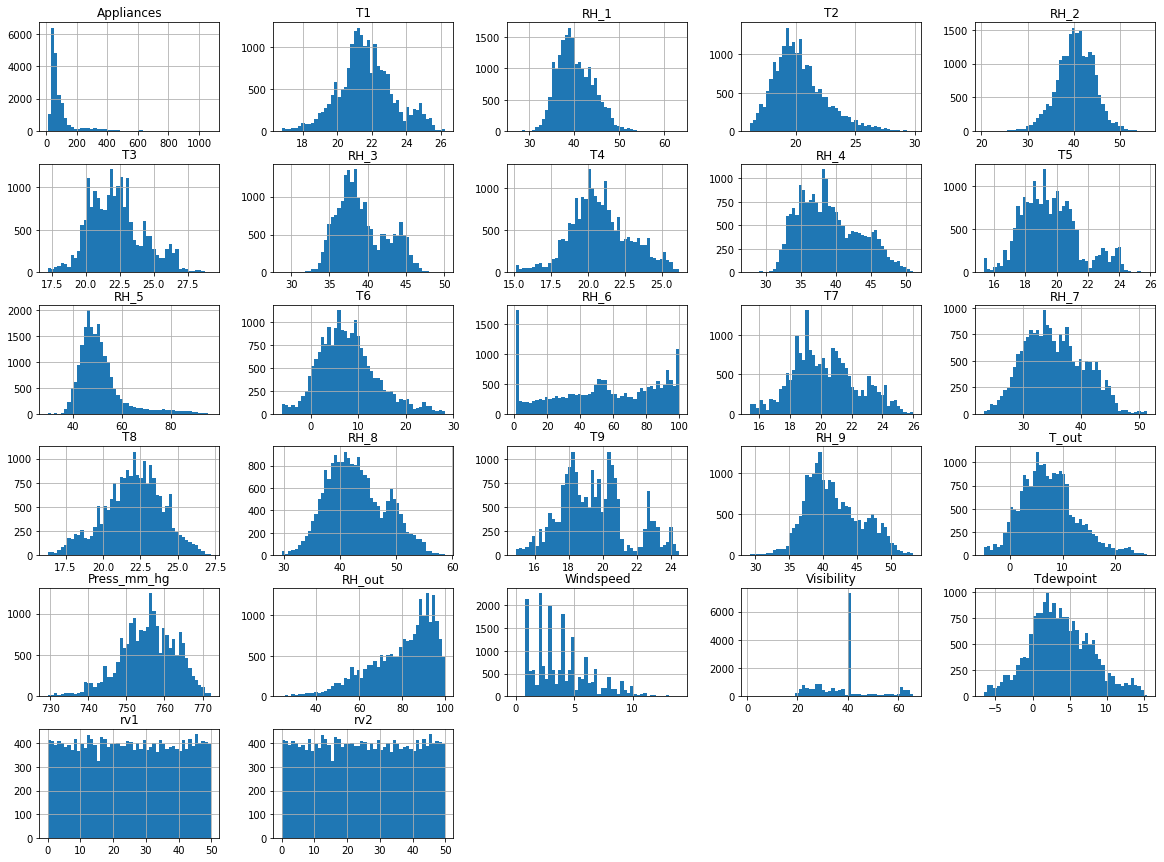

In [7]:
#using histogram for simple data visualization of numerical attributes 
quiz_set.hist(bins=50, figsize=(20,15))

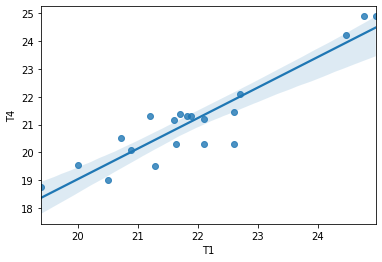

In [8]:
#select a sample of the dataset
linear_reg_quiz_set = quiz_set[['T1','T4']] .sample(20, random_state=22)

#regression plot
sns.regplot(x='T1', y='T4', data=linear_reg_quiz_set)

In [9]:
#normalizing the dataset to a common scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_quiz_set = pd.DataFrame(scaler.fit_transform(quiz_set), columns=quiz_set.columns)
features_quiz_set = normalised_quiz_set.drop(columns=["Appliances"])
target_quiz_set = normalised_quiz_set['Appliances']

# Further Data Exploration with copied version of processed data

THE FOLLOWING COUPLE OF CELLS WILL INCLUDE FURTHER DATA EXPLORATION, HOWEVER TO AVOID TAMPERING WITH THE DATA BEFORE TRAINING AND TESTING, I SHALL BE MAKING A COPY OF THE NORMALIZED DATASET BEFORE PROCEEDING WITH EXPLORATION. 

In [10]:
#making a different copy of the normalized dataset to avoid altering the initial data
energyData = normalised_quiz_set.copy()

#Now, we split our copy of the normalized dataset into the training and testing dataset.
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(energyData, test_size=0.3, random_state=42)

energyData_train = train_set
energyData_test = test_set
energyData_B = pd.concat([energyData_test, energyData_train], axis=0, ignore_index=True)
energyData_B

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.028037,0.432946,0.230529,0.120669,0.525822,0.256730,0.380122,0.419820,0.279129,0.312470,0.322900,0.211427,0.635165,0.585297,0.371040,0.619049,0.347755,0.457856,0.408251,0.217578,0.920930,0.846491,0.166667,0.953846,0.298643,0.512428,0.512428
1,0.074766,0.538543,0.717641,0.377272,0.700066,0.368339,0.956224,0.489489,0.567933,0.224346,0.426866,0.250182,0.971587,0.141376,0.572518,0.394568,0.615604,0.145682,0.622241,0.247588,0.588372,0.868421,0.214286,0.400000,0.352941,0.469466,0.469466
2,0.037383,0.485744,0.233281,0.111461,0.564252,0.371109,0.300670,0.467568,0.260350,0.408027,0.157503,0.168777,0.504853,0.508954,0.145035,0.530363,0.343614,0.468262,0.377621,0.167203,0.858140,0.776316,0.142857,0.984615,0.190045,0.002761,0.002761
3,0.037383,0.485744,0.385561,0.566271,0.404255,0.401573,0.381679,0.656757,0.323346,0.411212,0.202260,0.501383,0.094001,0.439208,0.254965,0.447971,0.290953,0.561915,0.388797,0.445338,0.895349,0.616228,0.369048,0.600000,0.466817,0.205799,0.205799
4,0.056075,0.335093,0.223007,0.026411,0.552910,0.232635,0.356753,0.374775,0.311851,0.244625,0.288467,0.155193,0.710111,0.471254,0.385106,0.530363,0.342358,0.427680,0.477373,0.145766,0.938372,0.912281,0.285714,0.735897,0.233032,0.215015,0.215015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.046729,0.524815,0.381892,0.239157,0.636236,0.481888,0.478268,0.576577,0.517712,0.455805,0.250877,0.453064,0.483586,0.528746,0.386170,0.719561,0.543751,0.568852,0.471578,0.468382,0.492248,0.706140,0.476190,0.600000,0.562594,0.910318,0.910318
19731,0.102804,0.591341,0.458949,0.428883,0.607461,0.456962,0.582489,0.557658,0.702518,0.417582,0.285310,0.697375,0.194371,0.575872,0.597872,0.722612,0.596299,0.561915,0.625966,0.717042,0.469767,0.552632,0.142857,0.600000,0.791855,0.698711,0.698711
19732,0.018692,0.369588,0.238785,0.152653,0.481582,0.240944,0.412370,0.279279,0.325651,0.302914,0.161743,0.115704,0.828109,0.293120,0.241135,0.453464,0.414668,0.312175,0.426325,0.126474,0.595349,0.828947,0.261905,0.948718,0.165913,0.381388,0.381388
19733,0.065421,0.527983,0.234933,0.315047,0.412016,0.332336,0.380122,0.540541,0.341585,0.259914,0.245539,0.211468,0.968992,0.603205,0.269149,0.585291,0.338417,0.375650,0.509106,0.227224,0.831008,0.530702,0.095238,0.600000,0.114630,0.020909,0.020909


In [11]:
#inspect property of copied data before splitting
energyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [12]:
energyData_train

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,0.037383,0.497360,0.236767,0.122850,0.565939,0.373878,0.303474,0.476577,0.264760,0.408027,0.159533,0.180420,0.484901,0.508954,0.141844,0.530363,0.332077,0.475893,0.376380,0.168810,0.862791,0.776316,0.142857,0.984615,0.192308,0.724554,0.724554
2453,0.018692,0.286167,0.482616,0.188999,0.669978,0.217957,0.735317,0.270270,0.691421,0.178691,0.333576,0.275215,0.866532,0.329877,0.563121,0.227342,0.534613,0.240375,0.703504,0.262594,0.836434,0.807018,0.142857,0.600000,0.342383,0.864041,0.864041
9152,0.028037,0.422386,0.230529,0.057427,0.606430,0.373878,0.338059,0.414414,0.236449,0.378404,0.151639,0.131907,0.615369,0.471254,0.159574,0.496491,0.324195,0.468262,0.409803,0.110397,0.853488,0.859649,0.095238,0.917949,0.158371,0.499502,0.499502
12694,0.102804,0.560718,0.446840,0.280834,0.704002,0.514290,0.515189,0.540541,0.486556,0.509317,0.424604,0.444040,0.259050,0.559849,0.369220,0.740006,0.316450,0.561915,0.340784,0.444802,0.559690,0.750000,0.119048,0.384615,0.558069,0.323173,0.323173
16952,0.037383,0.835269,0.422071,1.000000,0.318493,0.745383,0.459106,0.900901,0.516432,0.748845,0.455819,0.944695,0.000000,0.811499,0.633121,0.744034,0.529678,0.854318,0.633278,0.849946,0.530233,0.355263,0.142857,0.600000,0.787330,0.341060,0.341060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.046729,0.524815,0.381892,0.239157,0.636236,0.481888,0.478268,0.576577,0.517712,0.455805,0.250877,0.453064,0.483586,0.528746,0.386170,0.719561,0.543751,0.568852,0.471578,0.468382,0.492248,0.706140,0.476190,0.600000,0.562594,0.910318,0.910318
11964,0.102804,0.591341,0.458949,0.428883,0.607461,0.456962,0.582489,0.557658,0.702518,0.417582,0.285310,0.697375,0.194371,0.575872,0.597872,0.722612,0.596299,0.561915,0.625966,0.717042,0.469767,0.552632,0.142857,0.600000,0.791855,0.698711,0.698711
5390,0.018692,0.369588,0.238785,0.152653,0.481582,0.240944,0.412370,0.279279,0.325651,0.302914,0.161743,0.115704,0.828109,0.293120,0.241135,0.453464,0.414668,0.312175,0.426325,0.126474,0.595349,0.828947,0.261905,0.948718,0.165913,0.381388,0.381388
860,0.065421,0.527983,0.234933,0.315047,0.412016,0.332336,0.380122,0.540541,0.341585,0.259914,0.245539,0.211468,0.968992,0.603205,0.269149,0.585291,0.338417,0.375650,0.509106,0.227224,0.831008,0.530702,0.095238,0.600000,0.114630,0.020909,0.020909


In [13]:
energyData_test

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8980,0.028037,0.432946,0.230529,0.120669,0.525822,0.256730,0.380122,0.419820,0.279129,0.312470,0.322900,0.211427,0.635165,0.585297,0.371040,0.619049,0.347755,0.457856,0.408251,0.217578,0.920930,0.846491,0.166667,0.953846,0.298643,0.512428,0.512428
2754,0.074766,0.538543,0.717641,0.377272,0.700066,0.368339,0.956224,0.489489,0.567933,0.224346,0.426866,0.250182,0.971587,0.141376,0.572518,0.394568,0.615604,0.145682,0.622241,0.247588,0.588372,0.868421,0.214286,0.400000,0.352941,0.469466,0.469466
9132,0.037383,0.485744,0.233281,0.111461,0.564252,0.371109,0.300670,0.467568,0.260350,0.408027,0.157503,0.168777,0.504853,0.508954,0.145035,0.530363,0.343614,0.468262,0.377621,0.167203,0.858140,0.776316,0.142857,0.984615,0.190045,0.002761,0.002761
14359,0.037383,0.485744,0.385561,0.566271,0.404255,0.401573,0.381679,0.656757,0.323346,0.411212,0.202260,0.501383,0.094001,0.439208,0.254965,0.447971,0.290953,0.561915,0.388797,0.445338,0.895349,0.616228,0.369048,0.600000,0.466817,0.205799,0.205799
8875,0.056075,0.335093,0.223007,0.026411,0.552910,0.232635,0.356753,0.374775,0.311851,0.244625,0.288467,0.155193,0.710111,0.471254,0.385106,0.530363,0.342358,0.427680,0.477373,0.145766,0.938372,0.912281,0.285714,0.735897,0.233032,0.215015,0.215015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.224299,0.560718,0.300248,0.370487,0.412504,0.386895,0.576414,0.608709,0.488263,0.264692,0.304506,0.179450,0.964105,0.383915,0.521277,0.361916,0.549235,0.312175,0.507726,0.220257,0.841860,0.756579,0.107143,0.430769,0.251131,0.910115,0.910115
10993,0.046729,0.518479,0.310063,0.225345,0.593214,0.481888,0.446799,0.464865,0.495092,0.446249,0.264410,0.428613,0.423660,0.565504,0.523641,0.667684,0.409870,0.561915,0.528422,0.439443,0.422093,0.651316,0.583333,0.600000,0.486425,0.975531,0.975531
11761,0.037383,0.436818,0.340611,0.188999,0.633705,0.381356,0.403490,0.422523,0.453692,0.378404,0.230779,0.455974,0.484934,0.431040,0.379433,0.447971,0.342358,0.490114,0.356926,0.392283,0.665504,0.796053,0.083333,0.969231,0.515083,0.792703,0.792703
12364,0.093458,0.550158,0.390973,0.334383,0.602774,0.481888,0.468453,0.576577,0.554702,0.503583,0.237746,0.560638,0.198635,0.534132,0.397518,0.530363,0.376885,0.620881,0.417770,0.494105,0.545736,0.596491,0.642857,0.600000,0.520362,0.608307,0.608307


In [14]:
#inspect property of data after splitting and merging back together 
energyData_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [15]:
#searching for and ranking correlation between each attribute and the target attribute ie "Appliances"
corr_matrix = energyData_B.corr()
corr_matrix['Appliances'].sort_values(ascending=False)

Appliances     1.000000
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

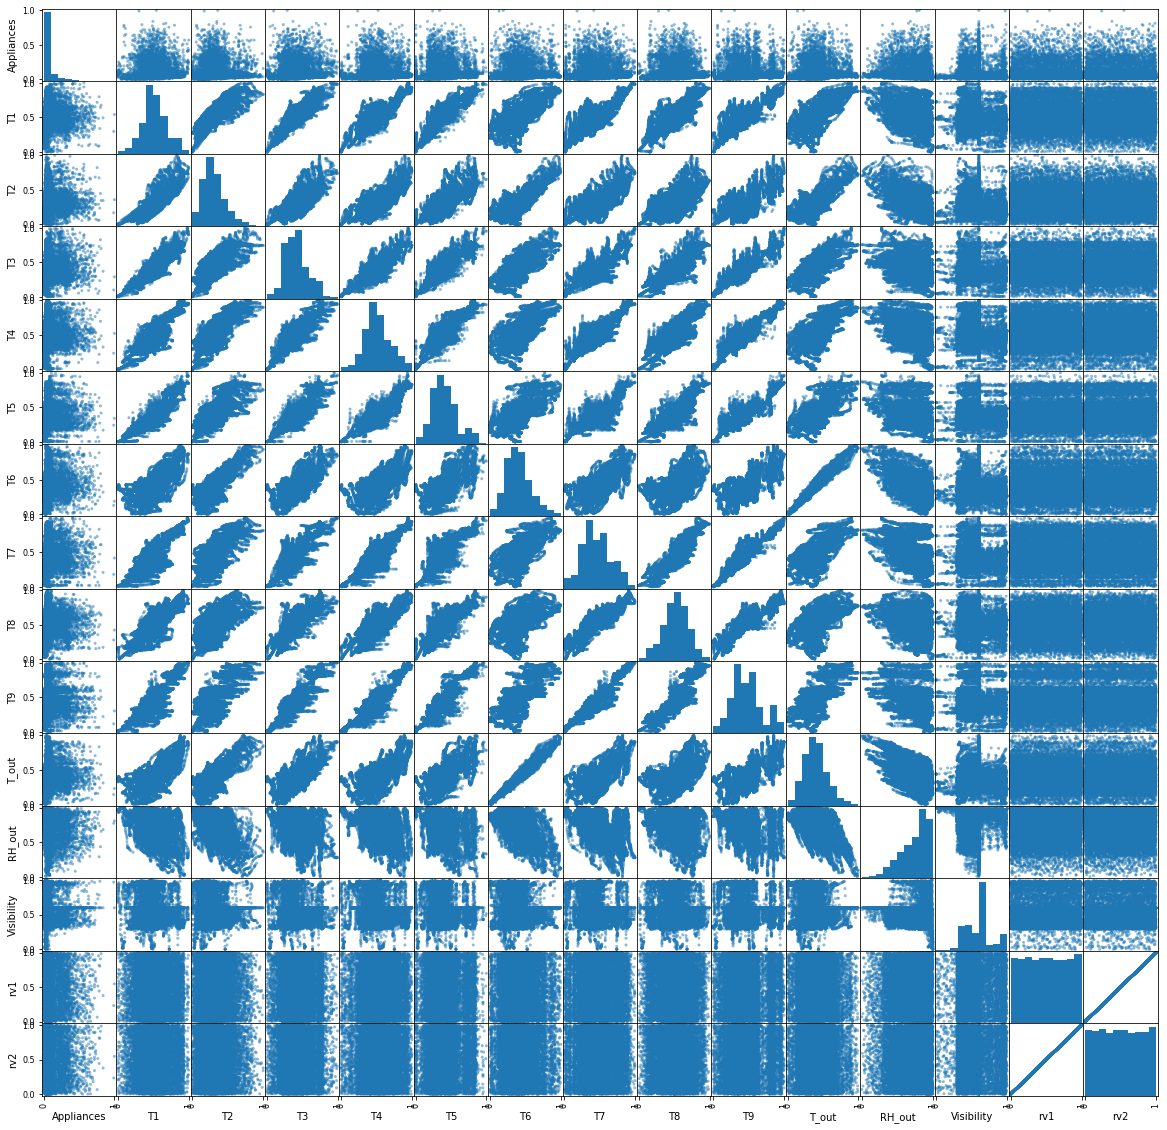

In [16]:
from pandas.plotting import scatter_matrix

features = ["Appliances", "T1", "T2",
              "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T_out", "RH_out", "Visibility", "rv1", "rv2"]
scatter_matrix(energyData_train[features], figsize=(20,20))

plt.show();

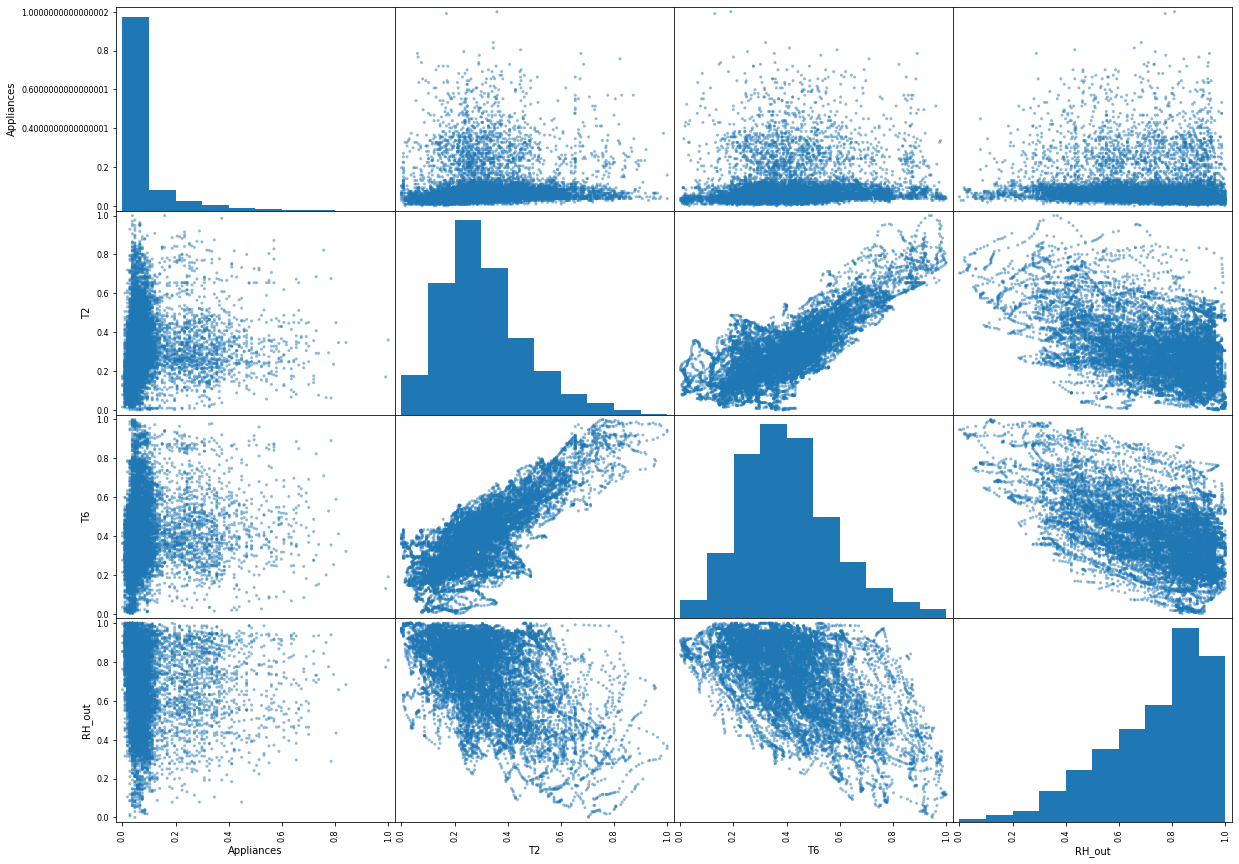

In [17]:
#taking a closer look at the more closely correlated features in the training dataset

attributes = ['Appliances', 'T2', 'T6', 'RH_out']
scatter_matrix(energyData_train[attributes], figsize=(20,15))

plt.show();


**T2**, *Temperature in living room area*, in Celsius
**T6**, *Temperature outside the building (north side)*, in Celsius
**RH_out**, *Humidity outside (from Chievres weather station)*, in %. Although the features in the dataset have all been normalized using the MinMaxScaler, exploration so far has revealed that these three features are most correlated with the **Appliances**- which is *the energy use in Wh*. An observation to keep in mind going forward

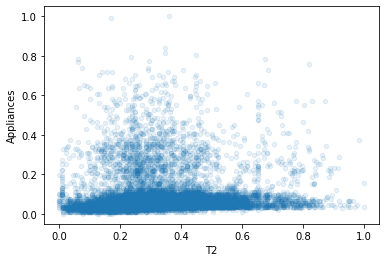

In [18]:
#zoom in on correlation scatter plot to search for any further hidden insights
energyData_train.plot(kind='scatter', x='T2', y='Appliances', alpha=0.1)

there doesn't seem to be any hidden patterns of correlation noise here that the model might learn, no further insights here for now. Moving On....

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabc8816f90>,
      dtype=object)

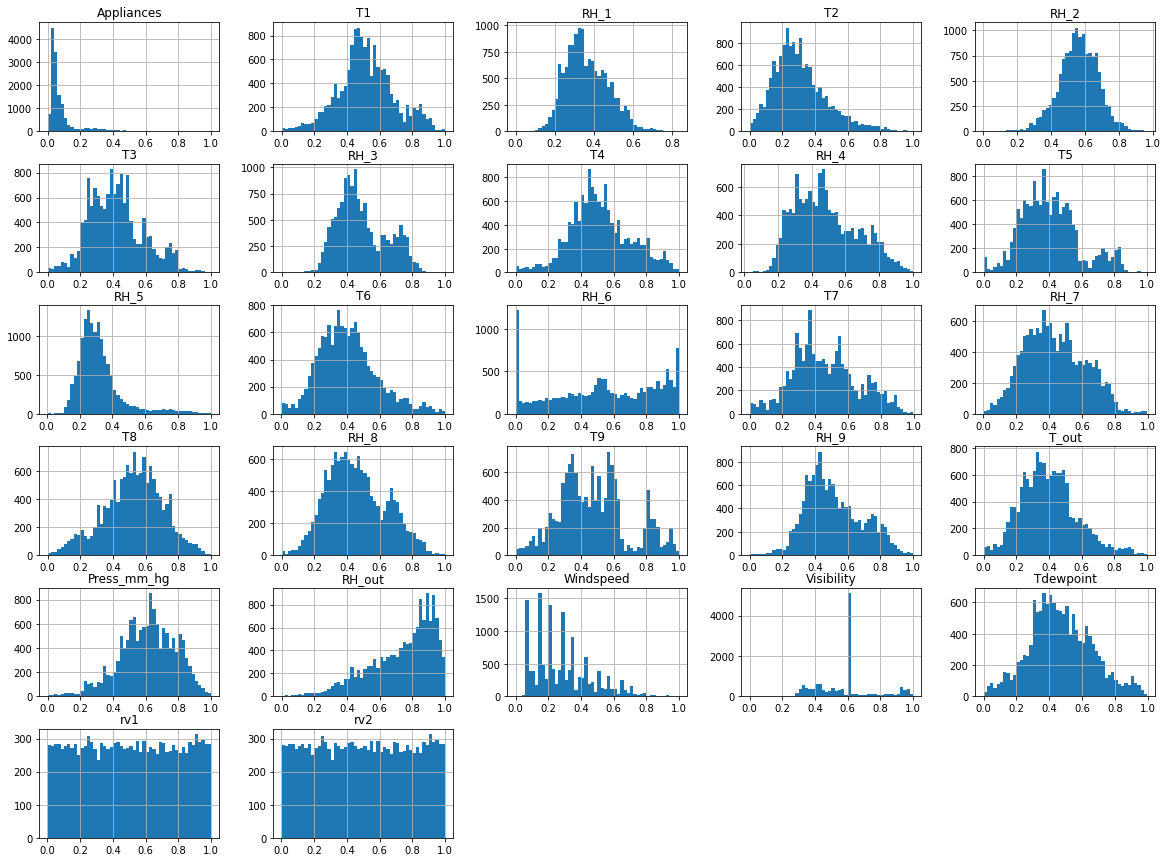

In [19]:
#using histogram for simple data visualization of numerical attributes 
energyData_train.hist(bins=50, figsize=(20,15))

the features seem to have very different distributions with some features looking fairly normal, while some look skewed to the left or right and other seem to have a long-tail distribution. Overall all of the features seem to have a low correlation to the target attribute ***i.e Applications***, while possessing high levels of colinearity with other features. May need to drop some features or engineer new features from these highly colinear features in the dataset

# Train Test Split, Models and Metrics.

In [20]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_quiz_set, target_quiz_set, test_size=0.3, random_state=42)

In [21]:
#import the LinearRegression Module from scikit-learn
from sklearn.linear_model import LinearRegression

## Fit an MLR algo!
MLR_model = LinearRegression().fit(x_train, y_train)

In [22]:
#evaluate the model on the training set
print('Training score: {}'.format((MLR_model.score(x_train, y_train)*100).round(2)) + "%"  )

Training score: 14.47%


In [23]:
# Print the coefficients/parameters of the model

print(MLR_model.coef_)

[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [24]:
# Look at the features again
x_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [25]:
# Assign all the features to a predictor variable

predictors = x_train.columns

# Make a pandas series off the predictors and asign them to the model's coefficients, sort the values from lowest to highest value
coef = pd.Series(MLR_model.coef_, predictors).sort_values()

print(coef)

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv1            0.000770
rv2            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64


Some of the weights there are negative, indicating a negative slope. If it is a negative slope, it means that as $x$ increases by 1 unit, $y$ decreases.

In [26]:
#make predictions with the model on the unseen data in the test set
y_pred = MLR_model.predict(x_test)

In [27]:
#performance check on the model using the MAE(Mean Absolute Error) metric
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 3) 

0.05

In [28]:
#mae result in percentage
mae = mae*100
round(mae, 3)

5.013

In [29]:
#performance check on the model using the RMSE(Mean Square Error) metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3) 

0.088

In [30]:
#rmse result in percentage
rmse = rmse*100
round(rmse, 3)

8.751

In [31]:
#performance check on the model using the r-squared metric
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 3) 

0.149

In [32]:
#r2_score result in percentage
r2_score = r2_score*100
round(r2_score, 3)

14.89

My personal observation, is that among all the metrics defined as used above, it seems the r-squared metric best closely represents the models performance relative to others.

# Regularization with LASSO, RIGDE AND ELASTI-NET

In [33]:
#import Ridge regularizer and fit model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_model = ridge_reg.fit(x_train, y_train)


In [34]:
#make predictions with the model on the unseen data in the test set
ridge_pred = ridge_model.predict(x_test)


In [35]:
#performance check on the model using the r-squared metric
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, ridge_pred)*100
round(r2_score, 3) 

14.838

In [36]:
#import Lasso algorithm and fit model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_model = lasso_reg.fit(x_train, y_train)

In [37]:
#make predictions with the model on the unseen data in the test set
lasso_pred = lasso_model.predict(x_test)

#performance check on the model using the r-squared metric
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, lasso_pred)*100
round(r2_score, 3) 

2.68

In [38]:
#import Elastinet algorithm and fit model
from sklearn.linear_model import ElasticNet
elasticNet_reg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False, max_iter=100000, warm_start=True)
elastiNet_model = elasticNet_reg.fit(x_train, y_train)

In [39]:
#make predictions with the model on the unseen data in the test set
elastiNet_pred = elastiNet_model.predict(x_test)

#performance check on the model using the r-squared metric
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, elastiNet_pred)*100
round(r2_score, 3) 

-0.0

obviously the models haven't learned enough, even before penalizing with regularization algorithms. It may yield better results to tune hyperparameters or try more complex models to combat the underfitting in our models

# Hamoye Quiz Attempt Section

In [52]:
from sklearn.model_selection import train_test_split

# Extract one feature for SLR as a pandas series
X = energyData[['T2']]
y = energyData['T6']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Randomly pick 5 row
X.sample(5)

,T2
5398,0.130119
6362,0.311849
5479,0.181730
5222,0.268234
3290,0.392537


In [69]:
energyData.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [54]:
simple_model = LinearRegression().fit(X, y)
print('Training finished, master!')

Training finished, master!


In [55]:
simple_pred = simple_model.predict(test_x)

In [79]:
# Evaluate model performance in percentage(question12)

#performance check on the model using the r-squared metric
from sklearn.metrics import r2_score
r2_score = r2_score(test_y, simple_pred)
round(r2_score, 2)


0.64

In [80]:
#performance check on the model using the MAE(Mean Absolute Error) metric(question13)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, simple_pred)
round(mae, 2) 

0.08

In [81]:
#(question14)
print("Residual sum of squares: %.2f"
  % ((simple_pred - test_y) ** 2).sum()) 

Residual sum of squares: 66.11


In [68]:
rss = (((simple_pred - test_y) ** 2).sum())/100
round(rss, 2)

0.66

In [82]:
#performance check on the model using the RMSE(Mean Square Error) metric(question15)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, simple_pred))
round(rmse, 3) 

0.106

In [70]:
# Assign all the features to a predictor variable

simple_predictors = train_x.columns

# Make a pandas series off the predictors and asign them to the model's coefficients, sort the values from lowest to highest value
coef2 = pd.Series(simple_model.coef_, simple_predictors).sort_values()

In [71]:
print(coef2)

T2    0.890974
dtype: float64


In [72]:
#import Ridge regularizer and fit model
from sklearn.linear_model import Ridge
ridge_reg2 = Ridge(alpha=0.4)
ridge_model2 = ridge_reg2.fit(x_train, y_train)

In [73]:
#make predictions with the model on the unseen data in the test set
ridge_pred2 = ridge_model2.predict(x_test)

In [75]:
#performance check on the model using the r-squared metric(ridge with alpha=0.4)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, ridge_pred2)
round(r2_score, 3) 

0.149

In [76]:
#performance check on the model using the r-squared metric(ridge with alpha=0.5)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, ridge_pred)
round(r2_score, 3) 

0.148

In [77]:
# Assign all the features to a predictor variable

predictors = x_train.columns

# Make a pandas series off the predictors and asign them to the lasso model's coefficients, sort the values from lowest to highest value
coef3 = pd.Series(lasso_model.coef_, predictors).sort_values()

print(coef3)

RH_out        -0.049557
RH_8          -0.000110
T1             0.000000
Tdewpoint      0.000000
Visibility     0.000000
Press_mm_hg   -0.000000
T_out          0.000000
RH_9          -0.000000
T9            -0.000000
T8             0.000000
RH_7          -0.000000
rv1           -0.000000
T7            -0.000000
T6             0.000000
RH_5           0.000000
T5            -0.000000
RH_4           0.000000
T4            -0.000000
RH_3           0.000000
T3             0.000000
RH_2          -0.000000
T2             0.000000
RH_6          -0.000000
rv2           -0.000000
Windspeed      0.002912
RH_1           0.017880
dtype: float64


In [78]:
#performance check on the model using the r-squared metric
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lasso_pred)*100
round(mse, 3) 

0.876